In [1]:
import pandas as pd
raw_df=pd.read_excel('attrition.xlsx')

In [3]:
raw_df.info()
##Objective Joined 0 we have to identify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Attrition           1470 non-null   int64 
 1   EmpID               1470 non-null   int64 
 2   Department          1470 non-null   object
 3   DistanceFromHome    1470 non-null   int64 
 4   Gender              1470 non-null   object
 5   HourlyRate          1470 non-null   int64 
 6   MonthlyIncome       1470 non-null   int64 
 7   NumCompaniesWorked  1470 non-null   int64 
 8   OverTime            1470 non-null   object
 9   PercentSalaryHike   1470 non-null   int64 
 10  JobSatisfaction     1470 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 126.5+ KB


In [9]:
raw_df.head()

,Attrition,EmpID,Department,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,JobSatisfaction
0,0,1001,Research & Development,2,Male,92,2090,6,Yes,15,3
1,0,1002,Research & Development,2,Male,40,3468,9,No,12,2
2,0,1003,Research & Development,3,Female,81,2670,4,Yes,20,1
3,0,1004,Research & Development,24,Male,67,2693,1,No,22,3
4,0,1005,Research & Development,27,Male,94,5237,6,No,13,3


In [7]:
raw_df

,Attrition,EmpID,Department,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,JobSatisfaction
0,0,1001,Research & Development,2,Male,92,2090,6,Yes,15,3
1,0,1002,Research & Development,2,Male,40,3468,9,No,12,2
2,0,1003,Research & Development,3,Female,81,2670,4,Yes,20,1
3,0,1004,Research & Development,24,Male,67,2693,1,No,22,3
4,0,1005,Research & Development,27,Male,94,5237,6,No,13,3
...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2466,Research & Development,1,Female,62,2977,1,No,12,4
1466,0,2467,Research & Development,5,Male,74,9936,0,No,19,1
1467,0,2468,Research & Development,6,Male,42,9991,4,No,15,1
1468,0,2469,Sales,2,Male,63,5390,2,No,14,2


In [11]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a dataframe called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'EmpID')
X_features.remove( 'Attrition')


In [13]:
print(X_features)

['Department', 'DistanceFromHome', 'Gender', 'HourlyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'JobSatisfaction']


In [15]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]


In [17]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.Attrition.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Attrition
Non-Null Count  Dtype   
--------------  -----   
1470 non-null   category
dtypes: category(1)
memory usage: 1.7 KB
None


In [19]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 1029 entries, 305 to 858
Series name: Attrition
Non-Null Count  Dtype   
--------------  -----   
1029 non-null   category
dtypes: category(1)
memory usage: 9.2 KB
None


In [21]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['Department','Gender','OverTime']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)



In [23]:
##-----------------------------------------------------------------------
##  2. Normalise the cont. columns
##-----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
continuous_columns= ['DistanceFromHome','HourlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','JobSatisfaction']
scaler_min_max = MinMaxScaler()
X_train_encoded[continuous_columns] = scaler_min_max.fit_transform(X_train_encoded[continuous_columns])
X_test_encoded[continuous_columns] = scaler_min_max.fit_transform(X_test_encoded[continuous_columns])

In [25]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 305 to 858
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DistanceFromHome                   1029 non-null   float64
 1   HourlyRate                         1029 non-null   float64
 2   MonthlyIncome                      1029 non-null   float64
 3   NumCompaniesWorked                 1029 non-null   float64
 4   PercentSalaryHike                  1029 non-null   float64
 5   JobSatisfaction                    1029 non-null   float64
 6   Department_Research & Development  1029 non-null   int32  
 7   Department_Sales                   1029 non-null   int32  
 8   Gender_Male                        1029 non-null   int32  
 9   OverTime_Yes                       1029 non-null   int32  
dtypes: float64(6), int32(4)
memory usage: 72.4 KB


In [27]:
X_train_encoded.head()

,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,JobSatisfaction,Department_Research & Development,Department_Sales,Gender_Male,OverTime_Yes
305,0.321429,0.714286,0.192049,0.333333,0.428571,1.0,1,0,1,0
956,0.250000,0.528571,0.169658,0.444444,0.500000,0.0,1,0,0,1
1352,0.000000,0.100000,0.248319,0.444444,0.000000,1.0,0,0,1,1
1153,0.607143,0.500000,0.086867,0.111111,0.571429,1.0,1,0,0,0
760,1.000000,0.871429,0.233762,0.111111,0.214286,1.0,0,1,0,0


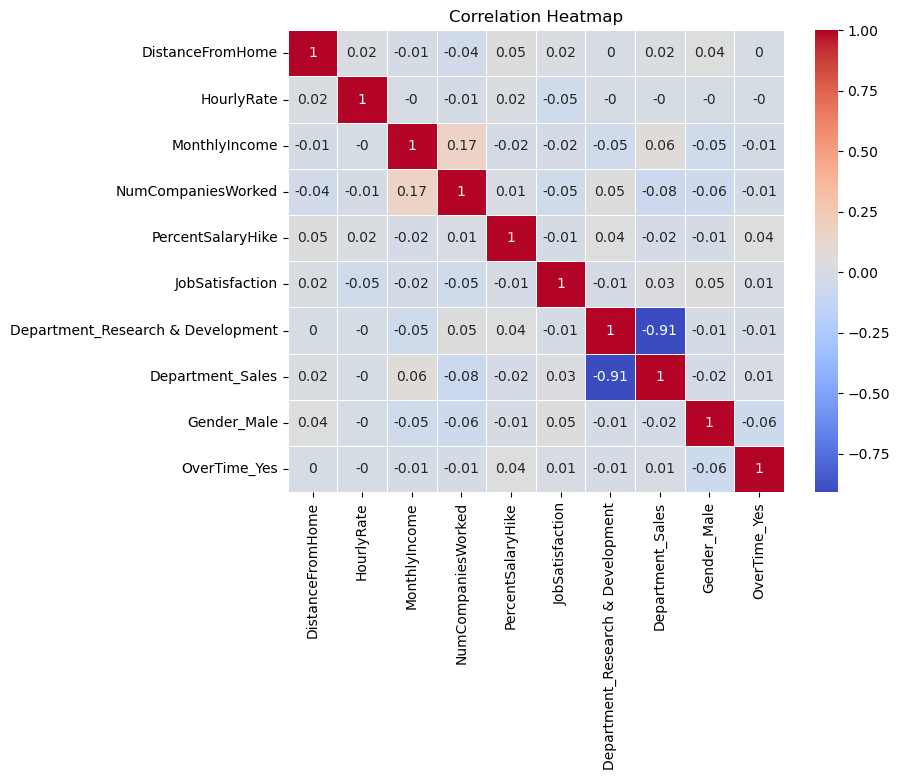

In [29]:
##-----------------------------------------------------------------------
##  3. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [51]:
from sklearn.neural_network import MLPClassifier
##nn_model = MLPClassifier(random_state=42)
##nn_model = MLPClassifier(random_state=42, verbose=True)
##nn_model = MLPClassifier(random_state=42, verbose=True, max_iter=1500, early_stopping=True) ##early stoppiong to stop the iteration when it no longer can change the error, or else itwill overfit the model
## here too many nodes are there in a hidden layer, so we hvae to reduce that , hence we calculate the number of nodes using that 2/3[number input variables+ levels of output]
##nn_model = MLPClassifier(random_state=42, verbose=True, max_iter=1500, early_stopping=True,hidden_layer_sizes=(12,) ) ##early stoppiong to stop the iteration when it no longer can change the error, or else itwill overfit the model
## wit this model, try to change the learning rate and try to increase specificity and sensitivity
nn_model = MLPClassifier(random_state=42, verbose=True, max_iter=1500, early_stopping=True,hidden_layer_sizes=(8,),learning_rate_init=0.2)

In [53]:
print("Hyperparameters of the MLPClassifier:\n",nn_model.get_params() )

Hyperparameters of the MLPClassifier:
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (8,), 'learning_rate': 'constant', 'learning_rate_init': 0.2, 'max_fun': 15000, 'max_iter': 1500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [55]:
##-------------------------------------------------------
##  Train NN model on training data
##-------------------------------------------------------
nn_model.fit(X_train_encoded, y_train)

Iteration 1, loss = 0.62350929
Validation score: 0.737864
Iteration 2, loss = 0.50482702
Validation score: 0.737864
Iteration 3, loss = 0.47021342
Validation score: 0.737864
Iteration 4, loss = 0.44218388
Validation score: 0.854369
Iteration 5, loss = 0.40909041
Validation score: 0.854369
Iteration 6, loss = 0.41424912
Validation score: 0.854369
Iteration 7, loss = 0.40925523
Validation score: 0.854369
Iteration 8, loss = 0.41557794
Validation score: 0.873786
Iteration 9, loss = 0.39947823
Validation score: 0.854369
Iteration 10, loss = 0.40519672
Validation score: 0.873786
Iteration 11, loss = 0.39641762
Validation score: 0.873786
Iteration 12, loss = 0.40288756
Validation score: 0.864078
Iteration 13, loss = 0.39634387
Validation score: 0.873786
Iteration 14, loss = 0.39540533
Validation score: 0.873786
Iteration 15, loss = 0.40234614
Validation score: 0.873786
Iteration 16, loss = 0.39492877
Validation score: 0.873786
Iteration 17, loss = 0.39442692
Validation score: 0.873786
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(8,),
              learning_rate_init=0.2, max_iter=1500, random_state=42,
              verbose=True)

In [57]:
##----------------------------
##  Apply model on test data
##----------------------------
y_prob=nn_model.predict_proba(X_test_encoded)[:,1] # probabilities
#y_prob holds the probability values for each record in the test data

In [59]:
y_prob

array([0.03692079, 0.62466675, 0.02141018, 0.68864168, 0.5791217 ,
       0.0423978 , 0.71399406, 0.71399406, 0.05485744, 0.71399406,
       0.71399406, 0.06994042, 0.12943297, 0.01148288, 0.03502596,
       0.06991126, 0.00128397, 0.14731224, 0.10917725, 0.06812639,
       0.02617367, 0.15924514, 0.04690677, 0.04488022, 0.001354  ,
       0.71399406, 0.04270814, 0.0751042 , 0.60864536, 0.04324671,
       0.51763134, 0.0498757 , 0.04707913, 0.04225979, 0.02335083,
       0.05797487, 0.71399406, 0.05509991, 0.00341314, 0.02377881,
       0.04627709, 0.03830544, 0.71399406, 0.00135426, 0.03277447,
       0.00171597, 0.59652218, 0.04483685, 0.63265249, 0.10233392,
       0.09658054, 0.00712014, 0.71399406, 0.19664973, 0.13183134,
       0.11176896, 0.13109511, 0.03741843, 0.02523228, 0.1507553 ,
       0.07751913, 0.01779842, 0.1417419 , 0.11777235, 0.71399406,
       0.00714236, 0.11652374, 0.05326671, 0.09635191, 0.00918901,
       0.01883717, 0.01766594, 0.04311087, 0.02969783, 0.64086

In [61]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})
print(y_pred_df.head())

     actual_Y  predicted_prob
653         0        0.036921
825         1        0.624667
968         0        0.021410
802         1        0.688642
1322        1        0.579122


In [168]:
##---------------------------------
##  Based on default cut-off -0.5 ## changed to 0.3
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
653         0        0.036921            0
825         1        0.624667            1
968         0        0.021410            0
802         1        0.688642            1
1322        1        0.579122            1


In [170]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[286  36]
 [ 31  88]]


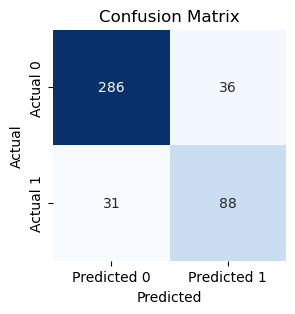

In [172]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [174]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
#print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.74
Accuracy: 0.85


In [176]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       322
           1       0.71      0.74      0.72       119

    accuracy                           0.85       441
   macro avg       0.81      0.81      0.81       441
weighted avg       0.85      0.85      0.85       441



# For 0.5 Threshold
### Accuracy is 85%
### Specificity is 89%
### Sensitivity is 74%
### Reject ==> Hyperparameters --> Iterations=1500 with early stop -- hidden nodes=8 in a single layer

